# Transfer Learning


In [ ]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import LSTM
from keras.layers import concatenate
from keras.layers import Input
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [ ]:
# Compatibility layer between Python 2 and Python 3
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils
import pickle
from keras.layers import LSTM
from keras.layers import BatchNormalization

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# import images without generator

In [ ]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread

In [ ]:
train_data =r'C:\Users\cmp3woodwk\Desktop\deep transfer learning\gasf_all'
test_data =r'C:\Users\cmp3woodwk\Desktop\deep transfer learning\gasf_user1'

In [ ]:
# for 5 labels

def one_hot_label(img):
    label = img.split('.')[0]
    if label == 'one':
        ohl = np.array([1,0,0,0,0])
    elif label == 'two':
        ohl = np.array([0,1,0,0,0])
    elif label == 'three':
        ohl = np.array([0,0,1,0,0])
    elif label == 'four':
        ohl = np.array([0,0,0,1,0])
    elif label == 'five':
        ohl = np.array([0,0,0,0,1])
    else:
        print(label)
    return ohl

In [ ]:
def train_data_with_label():
  train_images = []
  for i in tqdm(os.listdir(train_data)):
    path = os.path.join(train_data, i)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (64,64))

    train_images.append([np.array(img)])

  return train_images

In [ ]:
def test_data_with_label():
  test_images = []
  for i in tqdm(os.listdir(test_data)):
    path = os.path.join(test_data, i)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (64,64))

    test_images.append([np.array(img)])



  return test_images

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

In [ ]:
training_images = train_data_with_label()
testing_images = test_data_with_label()
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,3)
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,3)


100%|███████████████████████████████████████████████████████████████████████████████| 874/874 [00:06<00:00, 129.72it/s]


# Model

In [ ]:
#mobile = keras.applications.mobilenet.MobileNet()
mobile = keras.applications.InceptionV3

In [ ]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [ ]:

def feature_normalize(dataset):

    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu)/sigma


In [ ]:


def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()



In [ ]:

def show_basic_dataframe_info(dataframe,
                              preview_rows=20):

    """
    This function shows basic information for the given dataframe
    Args:
        dataframe: A Pandas DataFrame expected to contain data
        preview_rows: An integer value of how many rows to preview
    Returns:
        Nothing
    """

    # Shape and how many rows and columns
    print("Number of columns in the dataframe: %i" % (dataframe.shape[1]))
    print("Number of rows in the dataframe: %i\n" % (dataframe.shape[0]))
    print("First 20 rows of the dataframe:\n")
    # Show first 20 rows
    print(dataframe.head(preview_rows))
    print("\nDescription of dataframe:\n")
    # Describe dataset like mean, min, max, etc.
    # print(dataframe.describe())



In [ ]:
def read_data(file_path):
    column_names =  ['AirPressure' , 'EDA' , 'EnvNoise' , 'HR', 'UV' , 'X' , 'Y' , 'Z' ,'Motion', 'bTemp' ,'state']
    df = pd.read_csv(file_path,
                     header=None,
                     names=column_names)
    df.dropna(axis=0, how='any', inplace=True)
    return df

In [ ]:
def read_data2(file_path):
    column_names =  ['EDA' , 'HR', 'X' , 'Y' , 'Z' ,'state']
    df = pd.read_csv(file_path,
                     header=None,
                     names=column_names)
    df.dropna(axis=0, how='any', inplace=True)
    return df



In [ ]:
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan



In [ ]:
def feature_normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu)/sigma

In [ ]:
def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

In [ ]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, data['timestamp'], data['x-axis'], 'x-axis')
    plot_axis(ax1, data['timestamp'], data['y-axis'], 'y-axis')
    plot_axis(ax2, data['timestamp'], data['z-axis'], 'z-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

In [ ]:
def create_segments_and_labels(df, time_steps, step, label_name):

    """
    This function receives a dataframe and returns the reshaped segments
    of x,y,z acceleration as well as the corresponding labels
    Args:
        df: Dataframe in the expected format
        time_steps: Integer value of the length of a segment that is created
    Returns:
        reshaped_segments
        labels:
    """
    N_FEATURES = 2
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['EDA'].values[i: i + time_steps]
        ys = df['HR'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([xs, ys])
        labels.append(label)
    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

# Transfer learning

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',input_shape=(64,64,3)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 conv2d_1
1 conv2d_2
2 max_pooling2d_1
3 dropout_1
4 flatten_1
5 dense_1
6 dropout_2
7 dense_2


In [ ]:
#for layer in model.layers:
#    layer.trainable=True #50% accuracy when alone was false
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:


# ------- THE PROGRAM TO LOAD DATA AND TRAIN THE MODEL -------

# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')
print('keras version ', keras.__version__)

#LABELS = ["rest",
#          "experiment"]

LABELS = ["1", "2", "3", "4", "5"]







# The number of steps within one time segment
TIME_PERIODS = 100 #was 80
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 20 #was 40

# %%

print("\n--- Load, inspect and transform data ---\n")

# Load data set containing all the data from csv
df = read_data('all.csv')
df_user1 = read_data2('user1.csv')


# Describe the data
show_basic_dataframe_info(df, 20)

for activity in np.unique(df["state"]):
    subset = df[df["state"] == activity][:180]
    #plot_activity(activity, subset)

# Define column name of the label vector
LABEL = "ActivityEncoded"
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
#df[LABEL] = le.fit_transform(df["activity"].values.ravel())

df[LABEL] = le.fit_transform(df["state"].values.ravel())
df_user1[LABEL] = le.fit_transform(df_user1["state"].values.ravel())


# %%

print("\n--- Reshape the data into segments ---\n")

# Differentiate between test set and training set
df_test = df_user1
#df_train = df[df['user-id'] <= 5]
df_train = df

# Normalize features for training data set
df_train['EDA'] = feature_normalize(df['EDA'])
df_train['HR'] = feature_normalize(df['HR'])


# Reshape the training data into segments
# so that they can be processed by the network
x_train, y_train = create_segments_and_labels(df_train,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)


df_test['EDA'] = feature_normalize(df_user1['EDA'])
df_test['HR'] = feature_normalize(df_user1['HR'])

x_test1, y_test1 = create_segments_and_labels(df_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

n_input = 3


print("\n--- Reshape data to be accepted by Keras ---\n")

# Inspect x data
print('x_train shape: ', x_train.shape)
# Displays (20869, 40, 3)
print(x_train.shape[0], 'training samples')
# Displays 20869 train samples

# Inspect y data
print('y_train shape: ', y_train.shape)
# Displays (20869,)


keras version  2.3.1

--- Load, inspect and transform data ---

Number of columns in the dataframe: 11
Number of rows in the dataframe: 355089

First 20 rows of the dataframe:

    AirPressure    EDA  EnvNoise  HR  UV    X    Y    Z  Motion  bTemp  state
0        1003.3  20903        54  73   0  0.7 -0.3  0.5     0.9   33.2      5
1        1003.6  20903        54  73   0  0.9 -0.3 -0.1     0.9   33.2      5
2        1004.1  20903        54  73   0  0.2 -0.7 -0.7     1.0   33.1      5
3        1004.1  20903        54  73   0  0.2 -0.7 -0.7     1.0   33.1      5
4        1004.0  20903        54  73   0  0.2 -0.7 -0.7     1.0   33.1      5
5        1003.8  20903        54  73   0  0.2 -0.7 -0.7     1.0   33.1      5
6        1003.8  20903        54  73   0  0.1 -0.7 -0.7     1.1   33.1      5
7        1019.2  20903        54  73   0 -0.5 -0.6 -0.7     1.0   29.0      3
8        1019.2  20903        54  73   0 -0.5 -0.6 -0.8     1.1   29.0      3
9        1019.2  20903        54  73   0 -0

In [ ]:
df

,AirPressure,EDA,EnvNoise,HR,UV,X,Y,Z,Motion,bTemp,state,ActivityEncoded
0,1003.3,6.8,54,-0.6,0,0.7,-0.3,0.5,0.9,33.2,5,4
1,1003.6,6.8,54,-0.6,0,0.9,-0.3,-0.1,0.9,33.2,5,4
2,1004.1,6.8,54,-0.6,0,0.2,-0.7,-0.7,1.0,33.1,5,4
3,1004.1,6.8,54,-0.6,0,0.2,-0.7,-0.7,1.0,33.1,5,4
4,1004.0,6.8,54,-0.6,0,0.2,-0.7,-0.7,1.0,33.1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
355084,1003.7,-0.5,58,1.4,1,0.8,-0.1,0.0,0.8,33.8,5,4
355085,1003.7,-0.5,59,1.4,1,0.7,-1.0,0.0,1.2,33.8,5,4
355086,1003.7,-0.5,56,1.4,1,1.1,-0.5,0.3,1.2,33.8,5,4
355087,1003.7,-0.5,53,1.5,1,0.9,-0.4,0.3,1.0,33.8,5,4


In [ ]:
df.shape

(355089, 12)

In [ ]:
df.loc[df['state'] == 5]


,AirPressure,EDA,EnvNoise,HR,UV,X,Y,Z,Motion,bTemp,state,ActivityEncoded
0,1003.3,6.8,54,-0.6,0,0.7,-0.3,0.5,0.9,33.2,5,4
1,1003.6,6.8,54,-0.6,0,0.9,-0.3,-0.1,0.9,33.2,5,4
2,1004.1,6.8,54,-0.6,0,0.2,-0.7,-0.7,1.0,33.1,5,4
3,1004.1,6.8,54,-0.6,0,0.2,-0.7,-0.7,1.0,33.1,5,4
4,1004.0,6.8,54,-0.6,0,0.2,-0.7,-0.7,1.0,33.1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
355084,1003.7,-0.5,58,1.4,1,0.8,-0.1,0.0,0.8,33.8,5,4
355085,1003.7,-0.5,59,1.4,1,0.7,-1.0,0.0,1.2,33.8,5,4
355086,1003.7,-0.5,56,1.4,1,1.1,-0.5,0.3,1.2,33.8,5,4
355087,1003.7,-0.5,53,1.5,1,0.9,-0.4,0.3,1.0,33.8,5,4


In [ ]:

# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))
num_classes = 5
# Set input_shape / reshape for Keras
# Remark: acceleration data is concatenated in one array in order to feed
# it properly into coreml later, the preferred matrix of shape [40,3]
# cannot be read in with the current version of coreml (see also reshape
# layer as the first layer in the keras model)
input_shape = (num_time_periods*num_sensors)
x_train = x_train.reshape(x_train.shape[0], input_shape)


x_test1 = x_test1.reshape(x_test1.shape[0], input_shape)


print('x_train shape:', x_train.shape)
# x_train shape: (20869, 120)
print('input_shape:', input_shape)
# input_shape: (120)

# Convert type for Keras otherwise Keras cannot process the data
x_train = x_train.astype("float32")
y_train = y_train.astype("float32")

x_test1 = x_test1.astype("float32")
y_test1 = y_test1.astype("float32")

# %%

# One-hot encoding of y_train labels (only execute once!)
y_train = np_utils.to_categorical(y_train, num_classes)
y_test1 = np_utils.to_categorical(y_test1, num_classes)

print('New y_train shape: ', y_train.shape)
# (4173, 6)

# %%

print("\n--- Create neural network model ---\n")

# 1D CNN neural network
model_m = Sequential()
model_m.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model_m.add(Conv1D(32, 10, activation='tanh', input_shape=(TIME_PERIODS, num_sensors)))
model_m.add(BatchNormalization(axis = -1))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(64, 10, activation='tanh'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(num_classes, activation='sigmoid'))

print(model_m.summary())


ad = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)


model_m.compile(loss='binary_crossentropy',
                optimizer=ad, metrics=['accuracy'])



print(model_m.summary())
# Accuracy on training data: 99%
# Accuracy on test data: 91%

model3 = Model(model_m)
model5=Model(inputs=model_m.input,outputs=model_m.output)

model2 = Model(inputs=[model_m.input,
                       model.input],
               outputs=model_m.output)

model2.compile(loss='binary_crossentropy',
                optimizer=ad, metrics=['accuracy'])


[1.0, 2.0, 3.0, 4.0, 5.0]
x_train shape: (17750, 200)
input_shape: 200
New y_train shape:  (17750, 5)

--- Create neural network model ---

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 100, 2)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 91, 32)            672       
_________________________________________________________________
batch_normalization_1 (Batch (None, 91, 32)            128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 30, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 64)            20544     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)       

In [ ]:
num_classes

5

In [ ]:
_NUM_CLASSES = 2

def tfdata_generator(images, labels, is_training, batch_size=128):
    '''Construct a data generator using tf.Dataset'''

    def preprocess_fn(image, label):
        '''A transformation function to preprocess raw data
        into trainable input. '''
        x = tf.reshape(tf.cast(image, tf.float32), (64, 64, 3)) # last value was 1 not 3
        y = tf.one_hot(tf.cast(label, tf.uint8), _NUM_CLASSES)
        return x, y

    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    if is_training:
        dataset = dataset.shuffle(1000)  # depends on sample size

    # Transform and batch data at the same time
    dataset = dataset.apply(tf.contrib.data.map_and_batch(
        preprocess_fn, batch_size,
        num_parallel_batches=4,  # cpu cores
        drop_remainder=True if is_training else False))
    dataset = dataset.repeat()
    dataset = dataset.prefetch(tf.contrib.data.AUTOTUNE)

    return dataset




# 10 fold cross validation

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test2, y_train, y_test2 = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
tr_img_data, tst_img_data2 = train_test_split(tr_img_data, test_size=0.2, random_state=42)

KFold(n_splits=10, random_state=None, shuffle=True)
Train Index:  [    1     2     3 ... 14196 14197 14199] 

Test Index:  [    0     7    19 ... 14191 14193 14198]

--- Fit the model ---

Instructions for updating:
Use tf.cast instead.
Train on 10224 samples, validate on 2556 samples
Epoch 1/50
10224/10224 [==============================] - ETA: 3:22 - loss: 0.8111 - accuracy: 0.39 - ETA: 50s - loss: 0.7998 - accuracy: 0.3935 - ETA: 24s - loss: 0.7695 - accuracy: 0.439 - ETA: 17s - loss: 0.7510 - accuracy: 0.467 - ETA: 12s - loss: 0.7279 - accuracy: 0.501 - ETA: 9s - loss: 0.7116 - accuracy: 0.528 - ETA: 8s - loss: 0.6958 - accuracy: 0.55 - ETA: 6s - loss: 0.6791 - accuracy: 0.57 - ETA: 5s - loss: 0.6673 - accuracy: 0.59 - ETA: 4s - loss: 0.6546 - accuracy: 0.60 - ETA: 4s - loss: 0.6441 - accuracy: 0.61 - ETA: 3s - loss: 0.6334 - accuracy: 0.63 - ETA: 2s - loss: 0.6220 - accuracy: 0.64 - ETA: 2s - loss: 0.6129 - accuracy: 0.65 - ETA: 2s - loss: 0.6056 - accuracy: 0.65 - ETA: 1s - loss

10224/10224 [==============================] - ETA: 1s - loss: 0.3504 - accuracy: 0.83 - ETA: 1s - loss: 0.3629 - accuracy: 0.81 - ETA: 1s - loss: 0.3680 - accuracy: 0.81 - ETA: 0s - loss: 0.3669 - accuracy: 0.81 - ETA: 0s - loss: 0.3677 - accuracy: 0.81 - ETA: 0s - loss: 0.3694 - accuracy: 0.81 - ETA: 0s - loss: 0.3688 - accuracy: 0.81 - ETA: 0s - loss: 0.3687 - accuracy: 0.81 - ETA: 0s - loss: 0.3677 - accuracy: 0.81 - ETA: 0s - loss: 0.3672 - accuracy: 0.81 - ETA: 0s - loss: 0.3676 - accuracy: 0.81 - ETA: 0s - loss: 0.3679 - accuracy: 0.81 - ETA: 0s - loss: 0.3686 - accuracy: 0.81 - ETA: 0s - loss: 0.3682 - accuracy: 0.81 - ETA: 0s - loss: 0.3679 - accuracy: 0.81 - ETA: 0s - loss: 0.3684 - accuracy: 0.81 - ETA: 0s - loss: 0.3681 - accuracy: 0.81 - ETA: 0s - loss: 0.3684 - accuracy: 0.81 - ETA: 0s - loss: 0.3682 - accuracy: 0.81 - ETA: 0s - loss: 0.3682 - accuracy: 0.81 - ETA: 0s - loss: 0.3681 - accuracy: 0.81 - ETA: 0s - loss: 0.3680 - accuracy: 0.81 - 1s 142us/step - loss: 0.3678 

10224/10224 [==============================] - ETA: 1s - loss: 0.3095 - accuracy: 0.86 - ETA: 1s - loss: 0.3126 - accuracy: 0.85 - ETA: 1s - loss: 0.3091 - accuracy: 0.85 - ETA: 1s - loss: 0.3118 - accuracy: 0.85 - ETA: 0s - loss: 0.3115 - accuracy: 0.85 - ETA: 0s - loss: 0.3099 - accuracy: 0.85 - ETA: 0s - loss: 0.3089 - accuracy: 0.85 - ETA: 0s - loss: 0.3080 - accuracy: 0.85 - ETA: 0s - loss: 0.3096 - accuracy: 0.85 - ETA: 0s - loss: 0.3084 - accuracy: 0.85 - ETA: 0s - loss: 0.3087 - accuracy: 0.85 - ETA: 0s - loss: 0.3077 - accuracy: 0.85 - ETA: 0s - loss: 0.3073 - accuracy: 0.85 - ETA: 0s - loss: 0.3072 - accuracy: 0.85 - ETA: 0s - loss: 0.3080 - accuracy: 0.85 - ETA: 0s - loss: 0.3082 - accuracy: 0.85 - ETA: 0s - loss: 0.3087 - accuracy: 0.85 - ETA: 0s - loss: 0.3080 - accuracy: 0.85 - ETA: 0s - loss: 0.3084 - accuracy: 0.85 - ETA: 0s - loss: 0.3083 - accuracy: 0.85 - ETA: 0s - loss: 0.3089 - accuracy: 0.85 - ETA: 0s - loss: 0.3086 - accuracy: 0.85 - ETA: 0s - loss: 0.3088 - accu

10224/10224 [==============================] - ETA: 1s - loss: 0.2699 - accuracy: 0.87 - ETA: 1s - loss: 0.2628 - accuracy: 0.87 - ETA: 1s - loss: 0.2638 - accuracy: 0.87 - ETA: 1s - loss: 0.2639 - accuracy: 0.87 - ETA: 0s - loss: 0.2615 - accuracy: 0.88 - ETA: 0s - loss: 0.2632 - accuracy: 0.87 - ETA: 0s - loss: 0.2639 - accuracy: 0.87 - ETA: 0s - loss: 0.2640 - accuracy: 0.87 - ETA: 0s - loss: 0.2634 - accuracy: 0.88 - ETA: 0s - loss: 0.2633 - accuracy: 0.88 - ETA: 0s - loss: 0.2638 - accuracy: 0.87 - ETA: 0s - loss: 0.2637 - accuracy: 0.88 - ETA: 0s - loss: 0.2630 - accuracy: 0.88 - ETA: 0s - loss: 0.2627 - accuracy: 0.88 - ETA: 0s - loss: 0.2636 - accuracy: 0.88 - ETA: 0s - loss: 0.2636 - accuracy: 0.88 - ETA: 0s - loss: 0.2627 - accuracy: 0.88 - ETA: 0s - loss: 0.2632 - accuracy: 0.88 - ETA: 0s - loss: 0.2638 - accuracy: 0.88 - ETA: 0s - loss: 0.2637 - accuracy: 0.88 - ETA: 0s - loss: 0.2642 - accuracy: 0.88 - ETA: 0s - loss: 0.2643 - accuracy: 0.88 - 1s 137us/step - loss: 0.2643 

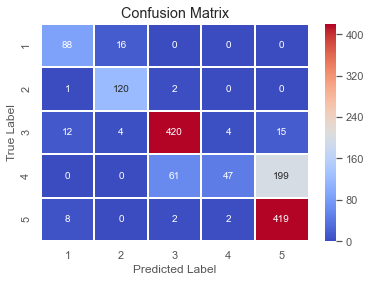


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       104
           1       0.86      0.98      0.91       123
           2       0.87      0.92      0.89       455
           3       0.89      0.15      0.26       307
           4       0.66      0.97      0.79       431

    accuracy                           0.77      1420
   macro avg       0.82      0.77      0.74      1420
weighted avg       0.80      0.77      0.72      1420

finished
Train Index:  [    0     1     2 ... 14197 14198 14199] 

Test Index:  [   10    12    29 ... 14176 14178 14185]

--- Fit the model ---

Train on 10224 samples, validate on 2556 samples
Epoch 1/50
10224/10224 [==============================] - ETA: 2s - loss: 0.2468 - accuracy: 0.89 - ETA: 1s - loss: 0.2379 - accuracy: 0.90 - ETA: 1s - loss: 0.2416 - accuracy: 0.89 - ETA: 1s - loss: 0.2399 - accuracy: 0.89 - ETA: 1s - loss: 0.2438 - accuracy: 0.89 - ET

10224/10224 [==============================] - ETA: 1s - loss: 0.2162 - accuracy: 0.91 - ETA: 1s - loss: 0.2349 - accuracy: 0.89 - ETA: 1s - loss: 0.2268 - accuracy: 0.89 - ETA: 1s - loss: 0.2243 - accuracy: 0.90 - ETA: 0s - loss: 0.2199 - accuracy: 0.90 - ETA: 0s - loss: 0.2212 - accuracy: 0.90 - ETA: 0s - loss: 0.2216 - accuracy: 0.90 - ETA: 0s - loss: 0.2204 - accuracy: 0.90 - ETA: 0s - loss: 0.2216 - accuracy: 0.90 - ETA: 0s - loss: 0.2225 - accuracy: 0.90 - ETA: 0s - loss: 0.2232 - accuracy: 0.90 - ETA: 0s - loss: 0.2232 - accuracy: 0.90 - ETA: 0s - loss: 0.2228 - accuracy: 0.90 - ETA: 0s - loss: 0.2223 - accuracy: 0.90 - ETA: 0s - loss: 0.2229 - accuracy: 0.90 - ETA: 0s - loss: 0.2232 - accuracy: 0.90 - ETA: 0s - loss: 0.2227 - accuracy: 0.90 - ETA: 0s - loss: 0.2224 - accuracy: 0.90 - ETA: 0s - loss: 0.2227 - accuracy: 0.90 - ETA: 0s - loss: 0.2220 - accuracy: 0.90 - ETA: 0s - loss: 0.2218 - accuracy: 0.90 - ETA: 0s - loss: 0.2214 - accuracy: 0.90 - 1s 143us/step - loss: 0.2209 

10224/10224 [==============================] - ETA: 1s - loss: 0.2168 - accuracy: 0.89 - ETA: 1s - loss: 0.2142 - accuracy: 0.90 - ETA: 1s - loss: 0.2101 - accuracy: 0.90 - ETA: 1s - loss: 0.2097 - accuracy: 0.90 - ETA: 1s - loss: 0.2117 - accuracy: 0.90 - ETA: 1s - loss: 0.2128 - accuracy: 0.90 - ETA: 0s - loss: 0.2090 - accuracy: 0.90 - ETA: 0s - loss: 0.2072 - accuracy: 0.90 - ETA: 0s - loss: 0.2082 - accuracy: 0.90 - ETA: 0s - loss: 0.2081 - accuracy: 0.90 - ETA: 0s - loss: 0.2080 - accuracy: 0.90 - ETA: 0s - loss: 0.2070 - accuracy: 0.90 - ETA: 0s - loss: 0.2058 - accuracy: 0.90 - ETA: 0s - loss: 0.2054 - accuracy: 0.90 - ETA: 0s - loss: 0.2047 - accuracy: 0.90 - ETA: 0s - loss: 0.2032 - accuracy: 0.90 - ETA: 0s - loss: 0.2031 - accuracy: 0.90 - ETA: 0s - loss: 0.2025 - accuracy: 0.91 - ETA: 0s - loss: 0.2026 - accuracy: 0.91 - ETA: 0s - loss: 0.2030 - accuracy: 0.91 - ETA: 0s - loss: 0.2037 - accuracy: 0.90 - ETA: 0s - loss: 0.2048 - accuracy: 0.90 - ETA: 0s - loss: 0.2041 - accu

10224/10224 [==============================] - ETA: 1s - loss: 0.2378 - accuracy: 0.90 - ETA: 1s - loss: 0.2018 - accuracy: 0.90 - ETA: 1s - loss: 0.1896 - accuracy: 0.91 - ETA: 1s - loss: 0.1845 - accuracy: 0.91 - ETA: 1s - loss: 0.1854 - accuracy: 0.91 - ETA: 1s - loss: 0.1867 - accuracy: 0.91 - ETA: 1s - loss: 0.1864 - accuracy: 0.91 - ETA: 1s - loss: 0.1893 - accuracy: 0.91 - ETA: 1s - loss: 0.1885 - accuracy: 0.91 - ETA: 0s - loss: 0.1881 - accuracy: 0.91 - ETA: 0s - loss: 0.1858 - accuracy: 0.91 - ETA: 0s - loss: 0.1871 - accuracy: 0.91 - ETA: 0s - loss: 0.1870 - accuracy: 0.91 - ETA: 0s - loss: 0.1887 - accuracy: 0.91 - ETA: 0s - loss: 0.1885 - accuracy: 0.91 - ETA: 0s - loss: 0.1881 - accuracy: 0.91 - ETA: 0s - loss: 0.1875 - accuracy: 0.91 - ETA: 0s - loss: 0.1879 - accuracy: 0.91 - ETA: 0s - loss: 0.1879 - accuracy: 0.91 - ETA: 0s - loss: 0.1876 - accuracy: 0.91 - ETA: 0s - loss: 0.1878 - accuracy: 0.91 - ETA: 0s - loss: 0.1884 - accuracy: 0.91 - ETA: 0s - loss: 0.1878 - accu

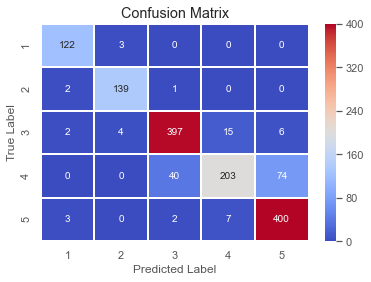


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       125
           1       0.95      0.98      0.97       142
           2       0.90      0.94      0.92       424
           3       0.90      0.64      0.75       317
           4       0.83      0.97      0.90       412

    accuracy                           0.89      1420
   macro avg       0.91      0.90      0.90      1420
weighted avg       0.89      0.89      0.88      1420

finished
Train Index:  [    0     1     2 ... 14197 14198 14199] 

Test Index:  [    6    21    23 ... 14181 14192 14196]

--- Fit the model ---

Train on 10224 samples, validate on 2556 samples
Epoch 1/50
10224/10224 [==============================] - ETA: 1s - loss: 0.1507 - accuracy: 0.93 - ETA: 1s - loss: 0.1766 - accuracy: 0.91 - ETA: 1s - loss: 0.1776 - accuracy: 0.91 - ETA: 1s - loss: 0.1771 - accuracy: 0.92 - ETA: 1s - loss: 0.1818 - accuracy: 0.91 - ET

10224/10224 [==============================] - ETA: 1s - loss: 0.2007 - accuracy: 0.92 - ETA: 1s - loss: 0.1584 - accuracy: 0.93 - ETA: 1s - loss: 0.1629 - accuracy: 0.93 - ETA: 1s - loss: 0.1685 - accuracy: 0.92 - ETA: 0s - loss: 0.1722 - accuracy: 0.92 - ETA: 0s - loss: 0.1712 - accuracy: 0.92 - ETA: 0s - loss: 0.1727 - accuracy: 0.92 - ETA: 0s - loss: 0.1723 - accuracy: 0.92 - ETA: 0s - loss: 0.1732 - accuracy: 0.92 - ETA: 0s - loss: 0.1733 - accuracy: 0.92 - ETA: 0s - loss: 0.1739 - accuracy: 0.92 - ETA: 0s - loss: 0.1743 - accuracy: 0.92 - ETA: 0s - loss: 0.1753 - accuracy: 0.92 - ETA: 0s - loss: 0.1761 - accuracy: 0.92 - ETA: 0s - loss: 0.1770 - accuracy: 0.91 - ETA: 0s - loss: 0.1766 - accuracy: 0.91 - ETA: 0s - loss: 0.1754 - accuracy: 0.91 - ETA: 0s - loss: 0.1759 - accuracy: 0.91 - ETA: 0s - loss: 0.1756 - accuracy: 0.92 - ETA: 0s - loss: 0.1764 - accuracy: 0.92 - ETA: 0s - loss: 0.1753 - accuracy: 0.92 - ETA: 0s - loss: 0.1752 - accuracy: 0.92 - 1s 137us/step - loss: 0.1751 

10224/10224 [==============================] - ETA: 1s - loss: 0.1899 - accuracy: 0.92 - ETA: 1s - loss: 0.1665 - accuracy: 0.92 - ETA: 1s - loss: 0.1665 - accuracy: 0.92 - ETA: 1s - loss: 0.1655 - accuracy: 0.92 - ETA: 0s - loss: 0.1650 - accuracy: 0.92 - ETA: 0s - loss: 0.1650 - accuracy: 0.92 - ETA: 0s - loss: 0.1645 - accuracy: 0.92 - ETA: 0s - loss: 0.1667 - accuracy: 0.92 - ETA: 0s - loss: 0.1673 - accuracy: 0.92 - ETA: 0s - loss: 0.1677 - accuracy: 0.92 - ETA: 0s - loss: 0.1666 - accuracy: 0.92 - ETA: 0s - loss: 0.1666 - accuracy: 0.92 - ETA: 0s - loss: 0.1670 - accuracy: 0.92 - ETA: 0s - loss: 0.1666 - accuracy: 0.92 - ETA: 0s - loss: 0.1668 - accuracy: 0.92 - ETA: 0s - loss: 0.1663 - accuracy: 0.92 - ETA: 0s - loss: 0.1661 - accuracy: 0.92 - ETA: 0s - loss: 0.1663 - accuracy: 0.92 - ETA: 0s - loss: 0.1669 - accuracy: 0.92 - ETA: 0s - loss: 0.1663 - accuracy: 0.92 - ETA: 0s - loss: 0.1671 - accuracy: 0.92 - ETA: 0s - loss: 0.1681 - accuracy: 0.92 - 1s 139us/step - loss: 0.1683 

10224/10224 [==============================] - ETA: 1s - loss: 0.1561 - accuracy: 0.92 - ETA: 1s - loss: 0.1588 - accuracy: 0.92 - ETA: 1s - loss: 0.1647 - accuracy: 0.92 - ETA: 0s - loss: 0.1578 - accuracy: 0.92 - ETA: 0s - loss: 0.1556 - accuracy: 0.93 - ETA: 0s - loss: 0.1558 - accuracy: 0.93 - ETA: 0s - loss: 0.1557 - accuracy: 0.93 - ETA: 0s - loss: 0.1539 - accuracy: 0.93 - ETA: 0s - loss: 0.1540 - accuracy: 0.93 - ETA: 0s - loss: 0.1540 - accuracy: 0.93 - ETA: 0s - loss: 0.1543 - accuracy: 0.93 - ETA: 0s - loss: 0.1537 - accuracy: 0.93 - ETA: 0s - loss: 0.1556 - accuracy: 0.93 - ETA: 0s - loss: 0.1553 - accuracy: 0.93 - ETA: 0s - loss: 0.1553 - accuracy: 0.93 - ETA: 0s - loss: 0.1570 - accuracy: 0.93 - ETA: 0s - loss: 0.1569 - accuracy: 0.93 - ETA: 0s - loss: 0.1572 - accuracy: 0.93 - ETA: 0s - loss: 0.1573 - accuracy: 0.92 - ETA: 0s - loss: 0.1572 - accuracy: 0.93 - ETA: 0s - loss: 0.1571 - accuracy: 0.92 - ETA: 0s - loss: 0.1571 - accuracy: 0.93 - 1s 138us/step - loss: 0.1569 

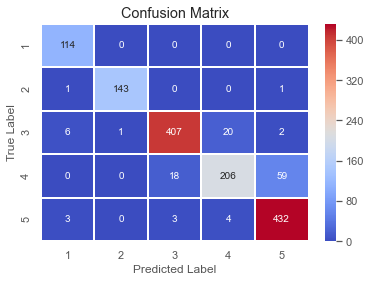


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       114
           1       0.99      0.99      0.99       145
           2       0.95      0.93      0.94       436
           3       0.90      0.73      0.80       283
           4       0.87      0.98      0.92       442

    accuracy                           0.92      1420
   macro avg       0.93      0.92      0.92      1420
weighted avg       0.92      0.92      0.91      1420

finished
Train Index:  [    0     1     2 ... 14197 14198 14199] 

Test Index:  [    5     9    18 ... 14151 14159 14189]

--- Fit the model ---

Train on 10224 samples, validate on 2556 samples
Epoch 1/50
10224/10224 [==============================] - ETA: 2s - loss: 0.1631 - accuracy: 0.93 - ETA: 1s - loss: 0.1629 - accuracy: 0.92 - ETA: 1s - loss: 0.1633 - accuracy: 0.92 - ETA: 1s - loss: 0.1615 - accuracy: 0.92 - ETA: 1s - loss: 0.1574 - accuracy: 0.92 - ET

10224/10224 [==============================] - ETA: 1s - loss: 0.1497 - accuracy: 0.94 - ETA: 1s - loss: 0.1390 - accuracy: 0.94 - ETA: 1s - loss: 0.1352 - accuracy: 0.94 - ETA: 1s - loss: 0.1404 - accuracy: 0.93 - ETA: 0s - loss: 0.1504 - accuracy: 0.93 - ETA: 0s - loss: 0.1519 - accuracy: 0.93 - ETA: 0s - loss: 0.1490 - accuracy: 0.93 - ETA: 0s - loss: 0.1544 - accuracy: 0.93 - ETA: 0s - loss: 0.1537 - accuracy: 0.93 - ETA: 0s - loss: 0.1518 - accuracy: 0.93 - ETA: 0s - loss: 0.1500 - accuracy: 0.93 - ETA: 0s - loss: 0.1505 - accuracy: 0.93 - ETA: 0s - loss: 0.1506 - accuracy: 0.93 - ETA: 0s - loss: 0.1495 - accuracy: 0.93 - ETA: 0s - loss: 0.1489 - accuracy: 0.93 - ETA: 0s - loss: 0.1502 - accuracy: 0.93 - ETA: 0s - loss: 0.1497 - accuracy: 0.93 - ETA: 0s - loss: 0.1488 - accuracy: 0.93 - ETA: 0s - loss: 0.1490 - accuracy: 0.93 - ETA: 0s - loss: 0.1487 - accuracy: 0.93 - ETA: 0s - loss: 0.1498 - accuracy: 0.93 - ETA: 0s - loss: 0.1513 - accuracy: 0.93 - 1s 141us/step - loss: 0.1513 

10224/10224 [==============================] - ETA: 1s - loss: 0.1437 - accuracy: 0.94 - ETA: 1s - loss: 0.1378 - accuracy: 0.93 - ETA: 1s - loss: 0.1531 - accuracy: 0.93 - ETA: 1s - loss: 0.1498 - accuracy: 0.93 - ETA: 1s - loss: 0.1483 - accuracy: 0.93 - ETA: 0s - loss: 0.1482 - accuracy: 0.93 - ETA: 0s - loss: 0.1464 - accuracy: 0.93 - ETA: 0s - loss: 0.1460 - accuracy: 0.93 - ETA: 0s - loss: 0.1453 - accuracy: 0.93 - ETA: 0s - loss: 0.1452 - accuracy: 0.93 - ETA: 0s - loss: 0.1448 - accuracy: 0.93 - ETA: 0s - loss: 0.1445 - accuracy: 0.93 - ETA: 0s - loss: 0.1450 - accuracy: 0.93 - ETA: 0s - loss: 0.1451 - accuracy: 0.93 - ETA: 0s - loss: 0.1444 - accuracy: 0.93 - ETA: 0s - loss: 0.1437 - accuracy: 0.93 - ETA: 0s - loss: 0.1435 - accuracy: 0.93 - ETA: 0s - loss: 0.1428 - accuracy: 0.93 - ETA: 0s - loss: 0.1433 - accuracy: 0.93 - ETA: 0s - loss: 0.1432 - accuracy: 0.93 - ETA: 0s - loss: 0.1430 - accuracy: 0.93 - ETA: 0s - loss: 0.1422 - accuracy: 0.93 - ETA: 0s - loss: 0.1430 - accu

10224/10224 [==============================] - ETA: 1s - loss: 0.1413 - accuracy: 0.94 - ETA: 1s - loss: 0.1450 - accuracy: 0.93 - ETA: 1s - loss: 0.1368 - accuracy: 0.94 - ETA: 1s - loss: 0.1399 - accuracy: 0.93 - ETA: 1s - loss: 0.1449 - accuracy: 0.93 - ETA: 1s - loss: 0.1443 - accuracy: 0.93 - ETA: 1s - loss: 0.1423 - accuracy: 0.93 - ETA: 1s - loss: 0.1415 - accuracy: 0.93 - ETA: 0s - loss: 0.1413 - accuracy: 0.93 - ETA: 0s - loss: 0.1420 - accuracy: 0.93 - ETA: 0s - loss: 0.1441 - accuracy: 0.93 - ETA: 0s - loss: 0.1437 - accuracy: 0.93 - ETA: 0s - loss: 0.1428 - accuracy: 0.93 - ETA: 0s - loss: 0.1429 - accuracy: 0.93 - ETA: 0s - loss: 0.1432 - accuracy: 0.93 - ETA: 0s - loss: 0.1429 - accuracy: 0.93 - ETA: 0s - loss: 0.1430 - accuracy: 0.93 - ETA: 0s - loss: 0.1422 - accuracy: 0.93 - ETA: 0s - loss: 0.1412 - accuracy: 0.93 - ETA: 0s - loss: 0.1412 - accuracy: 0.93 - ETA: 0s - loss: 0.1408 - accuracy: 0.93 - ETA: 0s - loss: 0.1401 - accuracy: 0.93 - ETA: 0s - loss: 0.1390 - accu

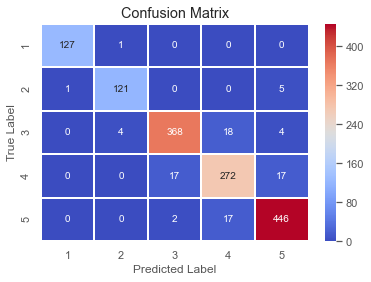


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       128
           1       0.96      0.95      0.96       127
           2       0.95      0.93      0.94       394
           3       0.89      0.89      0.89       306
           4       0.94      0.96      0.95       465

    accuracy                           0.94      1420
   macro avg       0.95      0.95      0.95      1420
weighted avg       0.94      0.94      0.94      1420

finished
Train Index:  [    0     1     2 ... 14196 14197 14198] 

Test Index:  [    8    11    14 ... 14187 14194 14199]

--- Fit the model ---

Train on 10224 samples, validate on 2556 samples
Epoch 1/50
10224/10224 [==============================] - ETA: 1s - loss: 0.1528 - accuracy: 0.93 - ETA: 1s - loss: 0.1489 - accuracy: 0.93 - ETA: 1s - loss: 0.1382 - accuracy: 0.94 - ETA: 1s - loss: 0.1391 - accuracy: 0.93 - ETA: 1s - loss: 0.1392 - accuracy: 0.94 - ET

10224/10224 [==============================] - ETA: 1s - loss: 0.1331 - accuracy: 0.93 - ETA: 1s - loss: 0.1295 - accuracy: 0.94 - ETA: 1s - loss: 0.1329 - accuracy: 0.94 - ETA: 1s - loss: 0.1346 - accuracy: 0.94 - ETA: 1s - loss: 0.1385 - accuracy: 0.93 - ETA: 0s - loss: 0.1371 - accuracy: 0.93 - ETA: 0s - loss: 0.1368 - accuracy: 0.93 - ETA: 0s - loss: 0.1367 - accuracy: 0.93 - ETA: 0s - loss: 0.1339 - accuracy: 0.94 - ETA: 0s - loss: 0.1336 - accuracy: 0.94 - ETA: 0s - loss: 0.1331 - accuracy: 0.94 - ETA: 0s - loss: 0.1340 - accuracy: 0.94 - ETA: 0s - loss: 0.1350 - accuracy: 0.94 - ETA: 0s - loss: 0.1345 - accuracy: 0.94 - ETA: 0s - loss: 0.1342 - accuracy: 0.94 - ETA: 0s - loss: 0.1352 - accuracy: 0.94 - ETA: 0s - loss: 0.1344 - accuracy: 0.94 - ETA: 0s - loss: 0.1345 - accuracy: 0.94 - ETA: 0s - loss: 0.1340 - accuracy: 0.94 - ETA: 0s - loss: 0.1337 - accuracy: 0.94 - ETA: 0s - loss: 0.1338 - accuracy: 0.94 - ETA: 0s - loss: 0.1344 - accuracy: 0.94 - ETA: 0s - loss: 0.1338 - accu

10224/10224 [==============================] - ETA: 0s - loss: 0.1279 - accuracy: 0.94 - ETA: 0s - loss: 0.1398 - accuracy: 0.94 - ETA: 0s - loss: 0.1293 - accuracy: 0.94 - ETA: 0s - loss: 0.1292 - accuracy: 0.94 - ETA: 0s - loss: 0.1289 - accuracy: 0.94 - ETA: 0s - loss: 0.1296 - accuracy: 0.94 - ETA: 0s - loss: 0.1314 - accuracy: 0.94 - ETA: 0s - loss: 0.1290 - accuracy: 0.94 - ETA: 0s - loss: 0.1295 - accuracy: 0.94 - ETA: 0s - loss: 0.1290 - accuracy: 0.94 - ETA: 0s - loss: 0.1294 - accuracy: 0.94 - ETA: 0s - loss: 0.1310 - accuracy: 0.94 - ETA: 0s - loss: 0.1319 - accuracy: 0.94 - ETA: 0s - loss: 0.1328 - accuracy: 0.94 - ETA: 0s - loss: 0.1331 - accuracy: 0.94 - ETA: 0s - loss: 0.1328 - accuracy: 0.94 - ETA: 0s - loss: 0.1331 - accuracy: 0.94 - ETA: 0s - loss: 0.1325 - accuracy: 0.94 - 1s 121us/step - loss: 0.1325 - accuracy: 0.9441 - val_loss: 0.0909 - val_accuracy: 0.9674
Epoch 30/50
10224/10224 [==============================] - ETA: 0s - loss: 0.1407 - accuracy: 0.93 - ETA: 1

10224/10224 [==============================] - ETA: 1s - loss: 0.0974 - accuracy: 0.95 - ETA: 1s - loss: 0.1181 - accuracy: 0.94 - ETA: 0s - loss: 0.1240 - accuracy: 0.94 - ETA: 0s - loss: 0.1253 - accuracy: 0.94 - ETA: 0s - loss: 0.1317 - accuracy: 0.94 - ETA: 0s - loss: 0.1278 - accuracy: 0.94 - ETA: 0s - loss: 0.1305 - accuracy: 0.94 - ETA: 0s - loss: 0.1303 - accuracy: 0.94 - ETA: 0s - loss: 0.1296 - accuracy: 0.94 - ETA: 0s - loss: 0.1298 - accuracy: 0.94 - ETA: 0s - loss: 0.1289 - accuracy: 0.94 - ETA: 0s - loss: 0.1290 - accuracy: 0.94 - ETA: 0s - loss: 0.1283 - accuracy: 0.94 - ETA: 0s - loss: 0.1273 - accuracy: 0.94 - ETA: 0s - loss: 0.1279 - accuracy: 0.94 - ETA: 0s - loss: 0.1268 - accuracy: 0.94 - ETA: 0s - loss: 0.1268 - accuracy: 0.94 - ETA: 0s - loss: 0.1270 - accuracy: 0.94 - 1s 122us/step - loss: 0.1275 - accuracy: 0.9456 - val_loss: 0.0863 - val_accuracy: 0.9720
Epoch 48/50
10224/10224 [==============================] - ETA: 1s - loss: 0.1215 - accuracy: 0.94 - ETA: 1

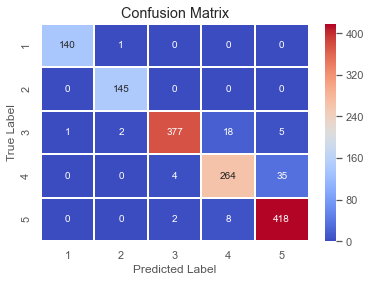


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.98      1.00      0.99       145
           2       0.98      0.94      0.96       403
           3       0.91      0.87      0.89       303
           4       0.91      0.98      0.94       428

    accuracy                           0.95      1420
   macro avg       0.96      0.96      0.96      1420
weighted avg       0.95      0.95      0.95      1420

finished
Train Index:  [    0     1     2 ... 14196 14198 14199] 

Test Index:  [   47    54    66 ... 14171 14186 14197]

--- Fit the model ---

Train on 10224 samples, validate on 2556 samples
Epoch 1/50
10224/10224 [==============================] - ETA: 0s - loss: 0.1250 - accuracy: 0.95 - ETA: 1s - loss: 0.1298 - accuracy: 0.94 - ETA: 0s - loss: 0.1319 - accuracy: 0.94 - ETA: 0s - loss: 0.1298 - accuracy: 0.94 - ETA: 0s - loss: 0.1279 - accuracy: 0.94 - ET

10224/10224 [==============================] - ETA: 1s - loss: 0.1260 - accuracy: 0.94 - ETA: 1s - loss: 0.1537 - accuracy: 0.93 - ETA: 0s - loss: 0.1386 - accuracy: 0.94 - ETA: 0s - loss: 0.1354 - accuracy: 0.94 - ETA: 0s - loss: 0.1276 - accuracy: 0.94 - ETA: 0s - loss: 0.1269 - accuracy: 0.94 - ETA: 0s - loss: 0.1239 - accuracy: 0.94 - ETA: 0s - loss: 0.1233 - accuracy: 0.94 - ETA: 0s - loss: 0.1218 - accuracy: 0.94 - ETA: 0s - loss: 0.1223 - accuracy: 0.94 - ETA: 0s - loss: 0.1230 - accuracy: 0.94 - ETA: 0s - loss: 0.1249 - accuracy: 0.94 - ETA: 0s - loss: 0.1280 - accuracy: 0.94 - ETA: 0s - loss: 0.1265 - accuracy: 0.94 - ETA: 0s - loss: 0.1274 - accuracy: 0.94 - ETA: 0s - loss: 0.1281 - accuracy: 0.94 - ETA: 0s - loss: 0.1270 - accuracy: 0.94 - 1s 122us/step - loss: 0.1274 - accuracy: 0.9454 - val_loss: 0.0900 - val_accuracy: 0.9645
Epoch 19/50
10224/10224 [==============================] - ETA: 1s - loss: 0.1476 - accuracy: 0.94 - ETA: 1s - loss: 0.1410 - accuracy: 0.94 - ETA: 0

10224/10224 [==============================] - ETA: 0s - loss: 0.1539 - accuracy: 0.92 - ETA: 1s - loss: 0.1221 - accuracy: 0.95 - ETA: 0s - loss: 0.1156 - accuracy: 0.95 - ETA: 0s - loss: 0.1192 - accuracy: 0.94 - ETA: 0s - loss: 0.1193 - accuracy: 0.94 - ETA: 0s - loss: 0.1192 - accuracy: 0.94 - ETA: 0s - loss: 0.1200 - accuracy: 0.94 - ETA: 0s - loss: 0.1222 - accuracy: 0.94 - ETA: 0s - loss: 0.1229 - accuracy: 0.94 - ETA: 0s - loss: 0.1229 - accuracy: 0.94 - ETA: 0s - loss: 0.1227 - accuracy: 0.94 - ETA: 0s - loss: 0.1228 - accuracy: 0.94 - ETA: 0s - loss: 0.1222 - accuracy: 0.94 - ETA: 0s - loss: 0.1205 - accuracy: 0.94 - ETA: 0s - loss: 0.1202 - accuracy: 0.94 - ETA: 0s - loss: 0.1195 - accuracy: 0.94 - ETA: 0s - loss: 0.1200 - accuracy: 0.94 - ETA: 0s - loss: 0.1209 - accuracy: 0.94 - 1s 123us/step - loss: 0.1207 - accuracy: 0.9486 - val_loss: 0.0890 - val_accuracy: 0.9728
Epoch 37/50
10224/10224 [==============================] - ETA: 1s - loss: 0.1009 - accuracy: 0.96 - ETA: 1

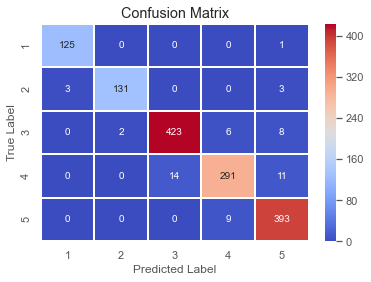


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       126
           1       0.98      0.96      0.97       137
           2       0.97      0.96      0.97       439
           3       0.95      0.92      0.94       316
           4       0.94      0.98      0.96       402

    accuracy                           0.96      1420
   macro avg       0.97      0.96      0.96      1420
weighted avg       0.96      0.96      0.96      1420

finished
Train Index:  [    0     1     2 ... 14197 14198 14199] 

Test Index:  [   20    24    45 ... 14165 14166 14173]

--- Fit the model ---

Train on 10224 samples, validate on 2556 samples
Epoch 1/50
10224/10224 [==============================] - ETA: 1s - loss: 0.1029 - accuracy: 0.94 - ETA: 1s - loss: 0.1137 - accuracy: 0.94 - ETA: 1s - loss: 0.1105 - accuracy: 0.95 - ETA: 0s - loss: 0.1199 - accuracy: 0.94 - ETA: 0s - loss: 0.1185 - accuracy: 0.95 - ET

10224/10224 [==============================] - ETA: 0s - loss: 0.0889 - accuracy: 0.96 - ETA: 0s - loss: 0.1234 - accuracy: 0.95 - ETA: 0s - loss: 0.1191 - accuracy: 0.95 - ETA: 0s - loss: 0.1151 - accuracy: 0.95 - ETA: 0s - loss: 0.1133 - accuracy: 0.95 - ETA: 0s - loss: 0.1136 - accuracy: 0.95 - ETA: 0s - loss: 0.1140 - accuracy: 0.95 - ETA: 0s - loss: 0.1146 - accuracy: 0.95 - ETA: 0s - loss: 0.1152 - accuracy: 0.95 - ETA: 0s - loss: 0.1177 - accuracy: 0.95 - ETA: 0s - loss: 0.1173 - accuracy: 0.95 - ETA: 0s - loss: 0.1197 - accuracy: 0.95 - ETA: 0s - loss: 0.1193 - accuracy: 0.95 - ETA: 0s - loss: 0.1186 - accuracy: 0.95 - ETA: 0s - loss: 0.1180 - accuracy: 0.95 - ETA: 0s - loss: 0.1181 - accuracy: 0.95 - ETA: 0s - loss: 0.1186 - accuracy: 0.95 - ETA: 0s - loss: 0.1178 - accuracy: 0.95 - 1s 122us/step - loss: 0.1186 - accuracy: 0.9507 - val_loss: 0.0790 - val_accuracy: 0.9775
Epoch 19/50
10224/10224 [==============================] - ETA: 1s - loss: 0.1233 - accuracy: 0.94 - ETA: 1

10224/10224 [==============================] - ETA: 0s - loss: 0.1103 - accuracy: 0.95 - ETA: 1s - loss: 0.1040 - accuracy: 0.95 - ETA: 0s - loss: 0.1039 - accuracy: 0.95 - ETA: 0s - loss: 0.1064 - accuracy: 0.95 - ETA: 0s - loss: 0.1094 - accuracy: 0.95 - ETA: 0s - loss: 0.1079 - accuracy: 0.95 - ETA: 0s - loss: 0.1069 - accuracy: 0.95 - ETA: 0s - loss: 0.1127 - accuracy: 0.95 - ETA: 0s - loss: 0.1117 - accuracy: 0.95 - ETA: 0s - loss: 0.1119 - accuracy: 0.95 - ETA: 0s - loss: 0.1114 - accuracy: 0.95 - ETA: 0s - loss: 0.1109 - accuracy: 0.95 - ETA: 0s - loss: 0.1132 - accuracy: 0.95 - ETA: 0s - loss: 0.1142 - accuracy: 0.95 - ETA: 0s - loss: 0.1134 - accuracy: 0.95 - ETA: 0s - loss: 0.1134 - accuracy: 0.95 - ETA: 0s - loss: 0.1129 - accuracy: 0.95 - 1s 119us/step - loss: 0.1132 - accuracy: 0.9534 - val_loss: 0.0722 - val_accuracy: 0.9790
Epoch 36/50
10224/10224 [==============================] - ETA: 1s - loss: 0.1349 - accuracy: 0.95 - ETA: 1s - loss: 0.1184 - accuracy: 0.95 - ETA: 0

10224/10224 [==============================] - ETA: 1s - loss: 0.0948 - accuracy: 0.96 - ETA: 1s - loss: 0.1064 - accuracy: 0.95 - ETA: 1s - loss: 0.1136 - accuracy: 0.95 - ETA: 1s - loss: 0.1169 - accuracy: 0.95 - ETA: 1s - loss: 0.1167 - accuracy: 0.95 - ETA: 0s - loss: 0.1156 - accuracy: 0.95 - ETA: 0s - loss: 0.1179 - accuracy: 0.95 - ETA: 0s - loss: 0.1178 - accuracy: 0.95 - ETA: 0s - loss: 0.1146 - accuracy: 0.95 - ETA: 0s - loss: 0.1141 - accuracy: 0.95 - ETA: 0s - loss: 0.1147 - accuracy: 0.95 - ETA: 0s - loss: 0.1135 - accuracy: 0.95 - ETA: 0s - loss: 0.1138 - accuracy: 0.95 - ETA: 0s - loss: 0.1140 - accuracy: 0.95 - ETA: 0s - loss: 0.1142 - accuracy: 0.95 - ETA: 0s - loss: 0.1140 - accuracy: 0.95 - ETA: 0s - loss: 0.1137 - accuracy: 0.95 - ETA: 0s - loss: 0.1135 - accuracy: 0.95 - ETA: 0s - loss: 0.1129 - accuracy: 0.95 - ETA: 0s - loss: 0.1136 - accuracy: 0.95 - ETA: 0s - loss: 0.1137 - accuracy: 0.95 - ETA: 0s - loss: 0.1137 - accuracy: 0.95 - ETA: 0s - loss: 0.1133 - accu

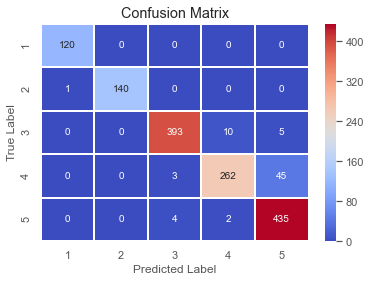


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       120
           1       1.00      0.99      1.00       141
           2       0.98      0.96      0.97       408
           3       0.96      0.85      0.90       310
           4       0.90      0.99      0.94       441

    accuracy                           0.95      1420
   macro avg       0.97      0.96      0.96      1420
weighted avg       0.95      0.95      0.95      1420

finished
Train Index:  [    0     1     2 ... 14197 14198 14199] 

Test Index:  [    3     4    15 ... 14156 14158 14162]

--- Fit the model ---

Train on 10224 samples, validate on 2556 samples
Epoch 1/50
10224/10224 [==============================] - ETA: 2s - loss: 0.0955 - accuracy: 0.96 - ETA: 1s - loss: 0.1054 - accuracy: 0.95 - ETA: 1s - loss: 0.1114 - accuracy: 0.95 - ETA: 1s - loss: 0.1101 - accuracy: 0.95 - ETA: 1s - loss: 0.1117 - accuracy: 0.95 - ET

10224/10224 [==============================] - ETA: 1s - loss: 0.1065 - accuracy: 0.95 - ETA: 1s - loss: 0.1103 - accuracy: 0.95 - ETA: 1s - loss: 0.1076 - accuracy: 0.95 - ETA: 1s - loss: 0.1126 - accuracy: 0.95 - ETA: 1s - loss: 0.1092 - accuracy: 0.95 - ETA: 0s - loss: 0.1074 - accuracy: 0.95 - ETA: 0s - loss: 0.1076 - accuracy: 0.95 - ETA: 0s - loss: 0.1067 - accuracy: 0.95 - ETA: 0s - loss: 0.1081 - accuracy: 0.95 - ETA: 0s - loss: 0.1076 - accuracy: 0.95 - ETA: 0s - loss: 0.1103 - accuracy: 0.95 - ETA: 0s - loss: 0.1123 - accuracy: 0.95 - ETA: 0s - loss: 0.1121 - accuracy: 0.95 - ETA: 0s - loss: 0.1121 - accuracy: 0.95 - ETA: 0s - loss: 0.1107 - accuracy: 0.95 - ETA: 0s - loss: 0.1096 - accuracy: 0.95 - ETA: 0s - loss: 0.1093 - accuracy: 0.95 - ETA: 0s - loss: 0.1086 - accuracy: 0.95 - ETA: 0s - loss: 0.1084 - accuracy: 0.95 - ETA: 0s - loss: 0.1081 - accuracy: 0.95 - ETA: 0s - loss: 0.1075 - accuracy: 0.95 - ETA: 0s - loss: 0.1068 - accuracy: 0.95 - ETA: 0s - loss: 0.1059 - accu

10224/10224 [==============================] - ETA: 1s - loss: 0.1124 - accuracy: 0.95 - ETA: 1s - loss: 0.1055 - accuracy: 0.95 - ETA: 1s - loss: 0.0954 - accuracy: 0.96 - ETA: 1s - loss: 0.0993 - accuracy: 0.96 - ETA: 1s - loss: 0.1061 - accuracy: 0.95 - ETA: 0s - loss: 0.1055 - accuracy: 0.95 - ETA: 0s - loss: 0.1074 - accuracy: 0.95 - ETA: 0s - loss: 0.1066 - accuracy: 0.95 - ETA: 0s - loss: 0.1045 - accuracy: 0.95 - ETA: 0s - loss: 0.1083 - accuracy: 0.95 - ETA: 0s - loss: 0.1059 - accuracy: 0.95 - ETA: 0s - loss: 0.1060 - accuracy: 0.95 - ETA: 0s - loss: 0.1076 - accuracy: 0.95 - ETA: 0s - loss: 0.1080 - accuracy: 0.95 - ETA: 0s - loss: 0.1090 - accuracy: 0.95 - ETA: 0s - loss: 0.1084 - accuracy: 0.95 - ETA: 0s - loss: 0.1080 - accuracy: 0.95 - ETA: 0s - loss: 0.1068 - accuracy: 0.95 - ETA: 0s - loss: 0.1083 - accuracy: 0.95 - ETA: 0s - loss: 0.1073 - accuracy: 0.95 - ETA: 0s - loss: 0.1077 - accuracy: 0.95 - ETA: 0s - loss: 0.1086 - accuracy: 0.95 - 1s 139us/step - loss: 0.1086 

10224/10224 [==============================] - ETA: 1s - loss: 0.0922 - accuracy: 0.96 - ETA: 1s - loss: 0.0916 - accuracy: 0.96 - ETA: 1s - loss: 0.1014 - accuracy: 0.95 - ETA: 1s - loss: 0.1061 - accuracy: 0.95 - ETA: 1s - loss: 0.1117 - accuracy: 0.95 - ETA: 1s - loss: 0.1126 - accuracy: 0.95 - ETA: 1s - loss: 0.1100 - accuracy: 0.95 - ETA: 0s - loss: 0.1085 - accuracy: 0.95 - ETA: 0s - loss: 0.1077 - accuracy: 0.95 - ETA: 0s - loss: 0.1061 - accuracy: 0.95 - ETA: 0s - loss: 0.1085 - accuracy: 0.95 - ETA: 0s - loss: 0.1115 - accuracy: 0.95 - ETA: 0s - loss: 0.1110 - accuracy: 0.95 - ETA: 0s - loss: 0.1117 - accuracy: 0.95 - ETA: 0s - loss: 0.1109 - accuracy: 0.95 - ETA: 0s - loss: 0.1104 - accuracy: 0.95 - ETA: 0s - loss: 0.1110 - accuracy: 0.95 - ETA: 0s - loss: 0.1113 - accuracy: 0.95 - ETA: 0s - loss: 0.1119 - accuracy: 0.95 - ETA: 0s - loss: 0.1110 - accuracy: 0.95 - ETA: 0s - loss: 0.1107 - accuracy: 0.95 - ETA: 0s - loss: 0.1112 - accuracy: 0.95 - ETA: 0s - loss: 0.1108 - accu

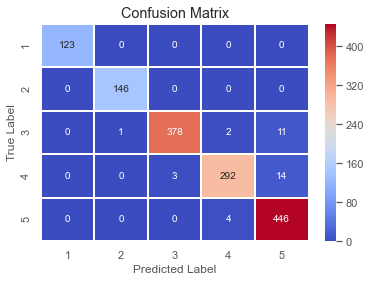


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       0.99      1.00      1.00       146
           2       0.99      0.96      0.98       392
           3       0.98      0.94      0.96       309
           4       0.95      0.99      0.97       450

    accuracy                           0.98      1420
   macro avg       0.98      0.98      0.98      1420
weighted avg       0.98      0.98      0.98      1420

finished
Train Index:  [    0     3     4 ... 14197 14198 14199] 

Test Index:  [    1     2    13 ... 14161 14170 14172]

--- Fit the model ---

Train on 10224 samples, validate on 2556 samples
Epoch 1/50
10224/10224 [==============================] - ETA: 1s - loss: 0.1194 - accuracy: 0.95 - ETA: 1s - loss: 0.1032 - accuracy: 0.96 - ETA: 1s - loss: 0.0990 - accuracy: 0.96 - ETA: 1s - loss: 0.0991 - accuracy: 0.96 - ETA: 1s - loss: 0.0994 - accuracy: 0.96 - ET

10224/10224 [==============================] - ETA: 1s - loss: 0.1051 - accuracy: 0.95 - ETA: 1s - loss: 0.1325 - accuracy: 0.94 - ETA: 1s - loss: 0.1150 - accuracy: 0.95 - ETA: 1s - loss: 0.1171 - accuracy: 0.95 - ETA: 1s - loss: 0.1152 - accuracy: 0.95 - ETA: 0s - loss: 0.1171 - accuracy: 0.95 - ETA: 0s - loss: 0.1204 - accuracy: 0.95 - ETA: 0s - loss: 0.1198 - accuracy: 0.95 - ETA: 0s - loss: 0.1164 - accuracy: 0.95 - ETA: 0s - loss: 0.1140 - accuracy: 0.95 - ETA: 0s - loss: 0.1151 - accuracy: 0.95 - ETA: 0s - loss: 0.1135 - accuracy: 0.95 - ETA: 0s - loss: 0.1116 - accuracy: 0.95 - ETA: 0s - loss: 0.1112 - accuracy: 0.95 - ETA: 0s - loss: 0.1104 - accuracy: 0.95 - ETA: 0s - loss: 0.1095 - accuracy: 0.95 - ETA: 0s - loss: 0.1095 - accuracy: 0.95 - ETA: 0s - loss: 0.1105 - accuracy: 0.95 - ETA: 0s - loss: 0.1096 - accuracy: 0.95 - ETA: 0s - loss: 0.1090 - accuracy: 0.95 - ETA: 0s - loss: 0.1104 - accuracy: 0.95 - ETA: 0s - loss: 0.1107 - accuracy: 0.95 - ETA: 0s - loss: 0.1107 - accu

10224/10224 [==============================] - ETA: 1s - loss: 0.2005 - accuracy: 0.92 - ETA: 1s - loss: 0.1169 - accuracy: 0.95 - ETA: 1s - loss: 0.1151 - accuracy: 0.95 - ETA: 1s - loss: 0.1083 - accuracy: 0.95 - ETA: 0s - loss: 0.1062 - accuracy: 0.95 - ETA: 0s - loss: 0.1070 - accuracy: 0.95 - ETA: 0s - loss: 0.1065 - accuracy: 0.95 - ETA: 0s - loss: 0.1101 - accuracy: 0.95 - ETA: 0s - loss: 0.1106 - accuracy: 0.95 - ETA: 0s - loss: 0.1104 - accuracy: 0.95 - ETA: 0s - loss: 0.1083 - accuracy: 0.95 - ETA: 0s - loss: 0.1075 - accuracy: 0.95 - ETA: 0s - loss: 0.1080 - accuracy: 0.95 - ETA: 0s - loss: 0.1078 - accuracy: 0.95 - ETA: 0s - loss: 0.1071 - accuracy: 0.95 - ETA: 0s - loss: 0.1061 - accuracy: 0.95 - ETA: 0s - loss: 0.1065 - accuracy: 0.95 - ETA: 0s - loss: 0.1058 - accuracy: 0.95 - ETA: 0s - loss: 0.1058 - accuracy: 0.95 - ETA: 0s - loss: 0.1060 - accuracy: 0.95 - ETA: 0s - loss: 0.1050 - accuracy: 0.95 - ETA: 0s - loss: 0.1045 - accuracy: 0.95 - ETA: 0s - loss: 0.1048 - accu

10224/10224 [==============================] - ETA: 1s - loss: 0.1034 - accuracy: 0.95 - ETA: 1s - loss: 0.1230 - accuracy: 0.94 - ETA: 1s - loss: 0.1133 - accuracy: 0.95 - ETA: 1s - loss: 0.1177 - accuracy: 0.95 - ETA: 1s - loss: 0.1078 - accuracy: 0.95 - ETA: 1s - loss: 0.1079 - accuracy: 0.95 - ETA: 0s - loss: 0.1060 - accuracy: 0.95 - ETA: 0s - loss: 0.1069 - accuracy: 0.95 - ETA: 0s - loss: 0.1044 - accuracy: 0.95 - ETA: 0s - loss: 0.1090 - accuracy: 0.95 - ETA: 0s - loss: 0.1086 - accuracy: 0.95 - ETA: 0s - loss: 0.1067 - accuracy: 0.95 - ETA: 0s - loss: 0.1051 - accuracy: 0.95 - ETA: 0s - loss: 0.1084 - accuracy: 0.95 - ETA: 0s - loss: 0.1095 - accuracy: 0.95 - ETA: 0s - loss: 0.1080 - accuracy: 0.95 - ETA: 0s - loss: 0.1074 - accuracy: 0.95 - ETA: 0s - loss: 0.1086 - accuracy: 0.95 - ETA: 0s - loss: 0.1083 - accuracy: 0.95 - ETA: 0s - loss: 0.1079 - accuracy: 0.95 - ETA: 0s - loss: 0.1071 - accuracy: 0.95 - ETA: 0s - loss: 0.1066 - accuracy: 0.95 - 1s 140us/step - loss: 0.1079 

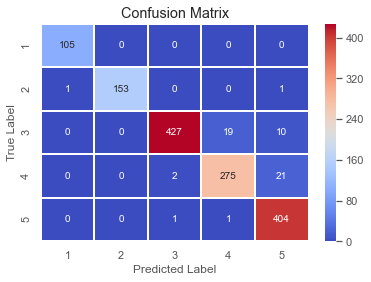


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       1.00      0.99      0.99       155
           2       0.99      0.94      0.96       456
           3       0.93      0.92      0.93       298
           4       0.93      1.00      0.96       406

    accuracy                           0.96      1420
   macro avg       0.97      0.97      0.97      1420
weighted avg       0.96      0.96      0.96      1420

finished
Train Index:  [    0     1     2 ... 14197 14198 14199] 

Test Index:  [   16    27    30 ... 14148 14182 14195]

--- Fit the model ---

Train on 10224 samples, validate on 2556 samples
Epoch 1/50
10224/10224 [==============================] - ETA: 2s - loss: 0.0765 - accuracy: 0.96 - ETA: 1s - loss: 0.0957 - accuracy: 0.96 - ETA: 1s - loss: 0.0961 - accuracy: 0.95 - ETA: 1s - loss: 0.1031 - accuracy: 0.95 - ETA: 1s - loss: 0.1020 - accuracy: 0.95 - ET

10224/10224 [==============================] - ETA: 1s - loss: 0.1188 - accuracy: 0.96 - ETA: 1s - loss: 0.1016 - accuracy: 0.96 - ETA: 1s - loss: 0.1119 - accuracy: 0.95 - ETA: 1s - loss: 0.1063 - accuracy: 0.95 - ETA: 0s - loss: 0.1054 - accuracy: 0.95 - ETA: 0s - loss: 0.1062 - accuracy: 0.95 - ETA: 0s - loss: 0.1027 - accuracy: 0.95 - ETA: 0s - loss: 0.1028 - accuracy: 0.95 - ETA: 0s - loss: 0.1057 - accuracy: 0.95 - ETA: 0s - loss: 0.1061 - accuracy: 0.95 - ETA: 0s - loss: 0.1047 - accuracy: 0.95 - ETA: 0s - loss: 0.1034 - accuracy: 0.95 - ETA: 0s - loss: 0.1027 - accuracy: 0.95 - ETA: 0s - loss: 0.1008 - accuracy: 0.95 - ETA: 0s - loss: 0.1004 - accuracy: 0.95 - ETA: 0s - loss: 0.1038 - accuracy: 0.95 - ETA: 0s - loss: 0.1030 - accuracy: 0.95 - ETA: 0s - loss: 0.1058 - accuracy: 0.95 - ETA: 0s - loss: 0.1059 - accuracy: 0.95 - ETA: 0s - loss: 0.1078 - accuracy: 0.95 - ETA: 0s - loss: 0.1080 - accuracy: 0.95 - ETA: 0s - loss: 0.1072 - accuracy: 0.95 - ETA: 0s - loss: 0.1078 - accu

10224/10224 [==============================] - ETA: 1s - loss: 0.1123 - accuracy: 0.95 - ETA: 1s - loss: 0.1111 - accuracy: 0.95 - ETA: 1s - loss: 0.1153 - accuracy: 0.95 - ETA: 1s - loss: 0.1160 - accuracy: 0.95 - ETA: 1s - loss: 0.1086 - accuracy: 0.95 - ETA: 0s - loss: 0.1069 - accuracy: 0.95 - ETA: 0s - loss: 0.1075 - accuracy: 0.95 - ETA: 0s - loss: 0.1089 - accuracy: 0.95 - ETA: 0s - loss: 0.1071 - accuracy: 0.95 - ETA: 0s - loss: 0.1075 - accuracy: 0.95 - ETA: 0s - loss: 0.1106 - accuracy: 0.95 - ETA: 0s - loss: 0.1094 - accuracy: 0.95 - ETA: 0s - loss: 0.1090 - accuracy: 0.95 - ETA: 0s - loss: 0.1077 - accuracy: 0.95 - ETA: 0s - loss: 0.1088 - accuracy: 0.95 - ETA: 0s - loss: 0.1076 - accuracy: 0.95 - ETA: 0s - loss: 0.1063 - accuracy: 0.95 - ETA: 0s - loss: 0.1068 - accuracy: 0.95 - ETA: 0s - loss: 0.1057 - accuracy: 0.95 - ETA: 0s - loss: 0.1052 - accuracy: 0.95 - ETA: 0s - loss: 0.1041 - accuracy: 0.95 - ETA: 0s - loss: 0.1048 - accuracy: 0.95 - 1s 139us/step - loss: 0.1049 

10224/10224 [==============================] - ETA: 1s - loss: 0.0939 - accuracy: 0.96 - ETA: 1s - loss: 0.0959 - accuracy: 0.96 - ETA: 1s - loss: 0.0978 - accuracy: 0.96 - ETA: 1s - loss: 0.1013 - accuracy: 0.95 - ETA: 0s - loss: 0.0994 - accuracy: 0.95 - ETA: 0s - loss: 0.0999 - accuracy: 0.95 - ETA: 0s - loss: 0.0983 - accuracy: 0.96 - ETA: 0s - loss: 0.1014 - accuracy: 0.95 - ETA: 0s - loss: 0.1027 - accuracy: 0.95 - ETA: 0s - loss: 0.1026 - accuracy: 0.95 - ETA: 0s - loss: 0.1003 - accuracy: 0.95 - ETA: 0s - loss: 0.1025 - accuracy: 0.95 - ETA: 0s - loss: 0.1020 - accuracy: 0.95 - ETA: 0s - loss: 0.1013 - accuracy: 0.95 - ETA: 0s - loss: 0.1026 - accuracy: 0.95 - ETA: 0s - loss: 0.1021 - accuracy: 0.95 - ETA: 0s - loss: 0.1023 - accuracy: 0.95 - ETA: 0s - loss: 0.1014 - accuracy: 0.95 - ETA: 0s - loss: 0.1005 - accuracy: 0.95 - ETA: 0s - loss: 0.0991 - accuracy: 0.95 - ETA: 0s - loss: 0.0988 - accuracy: 0.95 - ETA: 0s - loss: 0.1000 - accuracy: 0.95 - ETA: 0s - loss: 0.1002 - accu

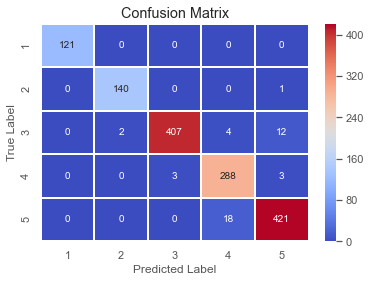


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       0.99      0.99      0.99       141
           2       0.99      0.96      0.97       425
           3       0.93      0.98      0.95       294
           4       0.96      0.96      0.96       439

    accuracy                           0.97      1420
   macro avg       0.97      0.98      0.98      1420
weighted avg       0.97      0.97      0.97      1420

finished


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True) # Define the split - into 2 folds
kf.get_n_splits(x_train) # returns the number of splitting iterations in the cross-validator
print(kf)
i=0

for train_index, test_index in kf.split(x_train):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, Y_train, Y_test = x_train[train_index], x_train[test_index], y_train[train_index], y_train[test_index]
    tr_img_data1, test_img_data1  = tr_img_data[train_index], tr_img_data[test_index]


    print("\n--- Fit the model ---\n")

    # The EarlyStopping callback monitors training accuracy:
    # if it fails to improve for two consecutive epochs,
    # training stops early
    callbacks_list = [
        keras.callbacks.ModelCheckpoint(
            filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
            monitor='val_loss', save_best_only=True),
        keras.callbacks.EarlyStopping(monitor='acc', patience=1)

    ]


    # Hyper-parameters
    BATCH_SIZE = 100
    EPOCHS = 50

    # Define the Keras TensorBoard callback.
    logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


     ##Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
    history = model2.fit([X_train, tr_img_data1],
                          Y_train,
                          batch_size=BATCH_SIZE,
                          epochs=EPOCHS,
                          callbacks=[tensorboard_callback],
                          validation_split=0.2,
                          verbose=1
                        )

    score = model2.evaluate([X_test, test_img_data1], Y_test, verbose=1)

    print("\nAccuracy on test data: %0.2f" % score[1])
    print("\nLoss on test data: %0.2f" % score[0])
    print("\n--- Confusion matrix for test data ---\n")

    y_pred_test = model2.predict([X_test, test_img_data1])
    print(kf.split)

    if i==0:
        y_pred_test_all = y_pred_test
        Y_test_all = Y_test
        X_test_all = X_test
        test_img_data1_all = test_img_data1
    if i>0:
        y_pred_test_all = np.concatenate((y_pred_test_all, y_pred_test))
        Y_test_all = np.concatenate((Y_test_all, Y_test))
        X_test_all = np.concatenate((X_test_all, X_test))
        test_img_data1_all = np.concatenate((test_img_data1_all, test_img_data1))

    # Take the class with the highest probability from the test predictions
    max_y_pred_test = np.argmax(y_pred_test, axis=1)
    max_y_test = np.argmax(Y_test, axis=1)

    show_confusion_matrix(max_y_test, max_y_pred_test)

    print("\n--- Classification report for test data ---\n")

    print(classification_report(max_y_test, max_y_pred_test))
    print("finished")
    i=i+1

3550/3550 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 130us/step


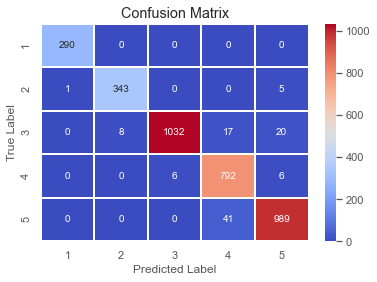


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       0.98      0.98      0.98       349
           2       0.99      0.96      0.98      1077
           3       0.93      0.99      0.96       804
           4       0.97      0.96      0.96      1030

    accuracy                           0.97      3550
   macro avg       0.97      0.98      0.98      3550
weighted avg       0.97      0.97      0.97      3550


Accuracy on test data: 0.984

Loss on test data: 0.059


In [ ]:
#per test train split

score = model2.evaluate([x_test2, tst_img_data2], y_test2, verbose=1)

y_pred_test = model2.predict([x_test2, tst_img_data2])
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test2, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print("\n--- Classification report for test data ---\n")

print(classification_report(max_y_test, max_y_pred_test))


print("\nAccuracy on test data: %0.3f" % score[1])
print("\nLoss on test data: %0.3f" % score[0])

1384/1384 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - 0s 136us/step


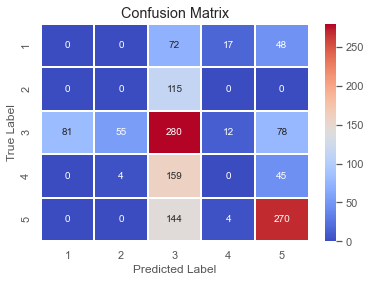


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.00      0.00      0.00       115
           2       0.36      0.55      0.44       506
           3       0.00      0.00      0.00       208
           4       0.61      0.65      0.63       418

    accuracy                           0.40      1384
   macro avg       0.20      0.24      0.21      1384
weighted avg       0.32      0.40      0.35      1384


Accuracy on test data: 0.758

Loss on test data: 1.663


In [ ]:
#per user

score = model2.evaluate([x_test1, tst_img_data], y_test1, verbose=1)

y_pred_test = model2.predict([x_test1, tst_img_data])
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test1, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print("\n--- Classification report for test data ---\n")

print(classification_report(max_y_test, max_y_pred_test))


print("\nAccuracy on test data: %0.3f" % score[1])
print("\nLoss on test data: %0.3f" % score[0])

In [ ]:
test_data =r'C:\Users\cmp3woodwk\Desktop\deep transfer learning\gasf_user20'
testing_images = test_data_with_label()
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,3)

100%|█████████████████████████████████████████████████████████████████████████████| 1384/1384 [00:12<00:00, 112.61it/s]


In [ ]:

df_user1 = read_data2('user20.csv')



# Define column name of the label vector
LABEL = "ActivityEncoded"
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_user1[LABEL] = le.fit_transform(df_user1["state"].values.ravel())


# %%

print("\n--- Reshape the data into segments ---\n")

# Differentiate between test set and training set
df_test = df_user1

df_test['EDA'] = feature_normalize(df_user1['EDA'])
df_test['HR'] = feature_normalize(df_user1['HR'])

x_test1, y_test1 = create_segments_and_labels(df_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)


print("\n--- Reshape data to be accepted by Keras ---\n")

# Inspect x data
print('x_train shape: ', x_train.shape)
# Displays (20869, 40, 3)
print(x_train.shape[0], 'training samples')
# Displays 20869 train samples

# Inspect y data
print('y_train shape: ', y_train.shape)
# Displays (20869,)



--- Reshape the data into segments ---


--- Reshape data to be accepted by Keras ---

x_train shape:  (14200, 200)
14200 training samples
y_train shape:  (14200, 5)


In [ ]:

# Set input & output dimensions

print(list(le.classes_))
num_classes = 5
# Set input_shape / reshape for Keras
# Remark: acceleration data is concatenated in one array in order to feed
# it properly into coreml later, the preferred matrix of shape [40,3]
# cannot be read in with the current version of coreml (see also reshape
# layer as the first layer in the keras model)
input_shape = (num_time_periods*num_sensors)

x_test1 = x_test1.reshape(x_test1.shape[0], input_shape)


print('x_train shape:', x_train.shape)
# x_train shape: (20869, 120)
print('input_shape:', input_shape)
# input_shape: (120)

x_test1 = x_test1.astype("float32")
y_test1 = y_test1.astype("float32")

# %%

# One-hot encoding of y_train labels (only execute once!)
y_test1 = np_utils.to_categorical(y_test1, num_classes)

print('New y_train shape: ', y_train.shape)
# (4173, 6)

print("\n--- Create neural network model ---\n")


[1, 2, 3, 4, 5]
x_train shape: (14200, 200)
input_shape: 200
New y_train shape:  (14200, 5)

--- Create neural network model ---



In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model2, title="My first neural network")

17750/17750 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 115us/step


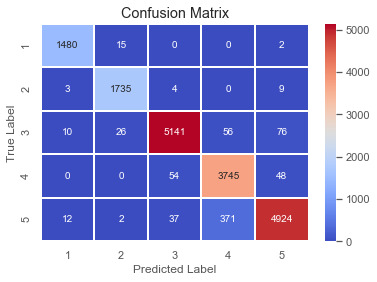


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       148
           1       0.99      1.00      0.99       178
           2       0.98      0.98      0.98       513
           3       0.96      1.00      0.98       373
           4       0.99      0.96      0.98       563

    accuracy                           0.98      1775
   macro avg       0.98      0.99      0.99      1775
weighted avg       0.98      0.98      0.98      1775


Accuracy on test data: 0.99

Loss on test data: 0.02


In [ ]:
score = model2.evaluate([X_test_all, test_img_data1_all], Y_test_all, verbose=1)

max_y_pred_test_all = np.argmax(y_pred_test_all, axis=1)
max_y_test_all = np.argmax(Y_test_all, axis=1)

show_confusion_matrix(max_y_test_all, max_y_pred_test_all)
print("\n--- Classification report for test data ---\n")

print(classification_report(max_y_test, max_y_pred_test))
print("\nAccuracy on test data: %0.2f" % score[1])
print("\nLoss on test data: %0.2f" % score[0])

In [ ]:
np.corrcoef([df_train['EDA'],df_train['HR'],df_train['UV'],df_train['bTemp'],df_train['AirPressure'],df_train['EnvNoise']])

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.style.use('ggplot')

plt.scatter(df_train['bTemp'], df_train['AirPressure'])
plt.show()

In [ ]:
from tempfile import TemporaryFile
outfile = TemporaryFile()

np.save(outfile, y_pred_test_all)

# No cross validation

In [ ]:
print("\n--- Fit the model ---\n")

# The EarlyStopping callback monitors training accuracy:
# if it fails to improve for two consecutive epochs,
# training stops early
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)

]


# Hyper-parameters
BATCH_SIZE = 100
EPOCHS = 50


 ##Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model2.fit([x_train, tr_img_data],
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1
                    )

# %%

print("\n--- Learning curve of model training ---\n")


print("\n--- Check against test data ---\n")

score = model2.evaluate(x_test, y_test, verbose=1)

print("\nAccuracy on test data: %0.2f" % score[1])
print("\nLoss on test data: %0.2f" % score[0])

# %%

print("\n--- Confusion matrix for test data ---\n")

y_pred_test = model_m.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print("\n--- Classification report for test data ---\n")

print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
x_train.shape

# Stop

In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
model2.fit_generator(generator=gen_flow,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

In [ ]:
model.evaluate_generator(generator=valid_generator,
steps=STEP_SIZE_VALID)

In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)
classes = test_generator.classes[test_generator.index_array]

In [ ]:
predicted_class_indices

In [ ]:
classes

In [ ]:
sum(predicted_class_indices==classes)/4096


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_generator.classes[test_generator.index_array],predicted_class_indices)


In [ ]:
#labels = (train_generator.class_indices) #original changed to test
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
predictions

In [ ]:
import pandas as pd
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

In [ ]:
results

Model is now trained. Now lets test some independent input images to check the predictions.

In [ ]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor

In [ ]:
img_path = 'experiment6.png'
new_image = load_image(img_path)

In [ ]:
pred = model.predict(new_image)